# Преобразование txt-файлов о хроматограммах и построение хроматограмм с помощью Python

Студент: Тутаев К.С. <br>
Группа: ХББО-02-20

## Раздел 1: Постановка задачи и исходные данные

&emsp;Хроматография - это процесс разделения, основанный на распределении веществ между подвижной и неподвижной фазами. В качестве подвижной фазы в жидкостной хроматографии выступает растворитель, а в качестве неподвижной фазы - сорбент. В лаборатории и в промышленности применяется колоночная хроматография, то есть процесс разделения веществ происходит в цилиндрической колонке. На выходе из колонки стоит детектор, который записывает изменение параметров подвижной фазы, например, электропроводность, оптическую плотность. Электропроводность позволяет следить за ионной силой и pH раствора, а оптическая плотность - за выходом из колонки веществ, например, белков. Хроматография используется в фармацевтической промышленности для очистки биологически активных веществ, например, рекомбинантных белков.

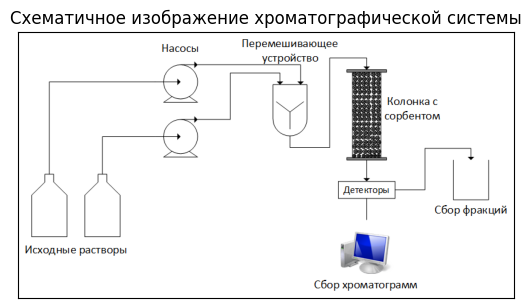

In [1]:
import matplotlib.pyplot as plt
img = plt.imread('./Схема хроматографии.tif')
plt.imshow(img)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.title('Схематичное изображение хроматографической системы')
plt.show()

&emsp;При выборе наиболее оптимальных условий хроматографии (скорость подвижной фазы, тип сорбента, составы буферных растворов) приходится проводить серию хроматографических разделений, при которых получается довольно большое количество хроматограмм. Хроматограммы позже анализируются для выбора наиболее оптимальных условий разделения, а также представляются в отчётах для подтверждения очистки веществ. Поэтому весьма важно получить хроматограммы в доступном формате для анализа.<br>
&emsp;В лаборатории молекулярной генетики внутриклеточного транспорта (институт биологии гена РАН) я выполнял очистку рекомбинантных белков с использованием колоночной хроматографии. В хроматографической системе
низкого давления BioLogic LP System (Bio-Rad, США) хроматограммы записываются в формате chd и txt. chd - это "родной" формат данной системы, который можно прочитать только в программе Image Lab. Данную программу нельзя установить на компьютер без подсоединения самой хроматографической системы. Кроме того, в данной программе весьма скудный функционал для редактирования графиков. В формате txt хроматографические данные можно перенести в Excel, однако каждый раз придётся удалять ненужные строки, переназывать столбцы и т.д.. Однако для решения данной задачи можно использовать Python. Таким образом, цель данной работы - создать программу для автоматического конвертирования нескольких txt файлов хроматограмм в несколько файлов Excel с одновременным построением экспресс хроматограмм. Несколько файлов хроматограмм будут храниться в папке для хроматограмм. Рассмотрим структуру txt файлов хроматограмм:

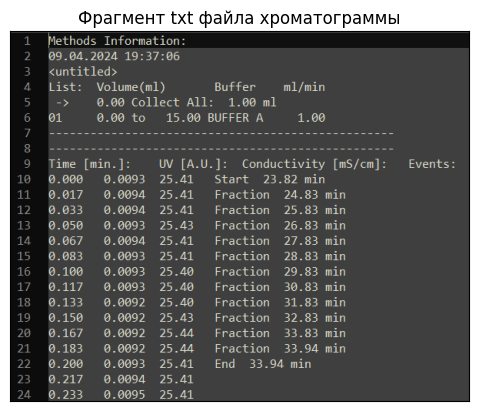

In [2]:
import matplotlib.pyplot as plt
img = plt.imread('./Пример_структуры_файла.png')
plt.imshow(img)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.title('Фрагмент txt файла хроматограммы')
plt.show()

&emsp;Для построения хроматограммы нам нужны строки с 9 до последней. Строки с 1 по 8 не представляют ценной информации. В разных хроматограммах количество начальных ненужных строк бывает разным. В строке 9 можно увидеть заглавия столбцов:


*   Time [min.]: - время, прошедшее с начала хроматографии в минутах;
*   UV [A.U.]: - оптическая плотность, записываемая детектором в единицах оптической плотности;
*   Conductivity [mS/cm]: - электропроводность, записываемая детектором в мСм/см;
*   Events: - этапы выполнения заданной хроматографической системе программы (Start - начало, Fraction - окончание сбора фракции, End - конец выполнения программы, Pause - остановка программы пользователем до окончания её выполнения) со временем начала/окончания этапа.

&emsp;Заметим, что столбцы Conductivity [mS/cm]:, Events: могут и не присутствовать в файле.<br>
&emsp;При переносе данных в Excel нам необходимо создать отдельную колонку для времени выполнения события, поскольку в исходном файле название события и время события находятся в одной колонке. Также нужно будет избавиться от слова min, чтобы Python воспринимал время в виде числа, а не в виде строки.<br>
&emsp;Колонки в файле разделены табуляцией, то есть на языке Python символом ```\t```.<br>
&emsp;При построении хроматограмм необходимо создавать две оси y, поскольку оптическая плотность и электропроводность измеряются в разных единицах измерения. Изображения хроматограмм необходимо сохранять, для того чтобы можно было после обработки файлов просмотреть правильность выполнения программы, а также корректность отображения данных.

## Раздел 2: Решение задачи

&emsp;Рассмотрим содержимое папки с хроматограммами. Для этого нам понадобится функция ```listdir()``` из модуля ```os```.

In [3]:
import os

path = r'./Хроматограммы' # путь к папке

os.listdir(path)

['207 09.04.24.txt',
 '207 29.03.24.txt',
 '207 Butyl-S 2.5 M NaCl 23.04.24.txt',
 '207 IB col. ref. 21.02.24.txt',
 'CD30-VHH1 10.04.24.txt',
 'CD30L-VHH1 DEAE grad 0-1 M NaCl 20 ml.txt',
 'и я не хроматограмма.rtf',
 'я не хроматограмма.bmp',
 'я тоже не хроматограмма']

&emsp;Как мы можем видеть, в папке есть как хроматограммы, так и не нужные нам файлы. Поэтому перед обработкой хроматограмм необходимо "проигнорировать" мешающие нам файлы. Для этого отфильтруем ненужное:

In [6]:
file_queue = [i for i in os.listdir(path) if i[-4:] == '.txt'] #Оставление только файлов с расширением txt
file_queue

['207 09.04.24.txt',
 '207 29.03.24.txt',
 '207 Butyl-S 2.5 M NaCl 23.04.24.txt',
 '207 IB col. ref. 21.02.24.txt',
 'CD30-VHH1 10.04.24.txt',
 'CD30L-VHH1 DEAE grad 0-1 M NaCl 20 ml.txt']

&emsp;Как мы можем видеть, в переменной ```file_queue``` оказались только хроматограммы.<br>
&emsp;Теперь, когда у нас есть готовый список файлов из папки, мы можем обработать каждую хроматограмму. Распишем алгоритм действий:<br>
1) С помощью цикла `for` будем перебирать все хроматограммы из списка `file_queue`;<br>
2) В переменную `name` будем записывать название файла с хроматограммой, а в переменную `file_path` - путь к читаемому файлу:<br>
```python
for i in file_queue:
    name = i[:-4]
    file_path = path + "/" + i
```
3) С помощью стандартного открытия `.txt` файлов в `python` прочитаем строки в файле и определим, где начинается полезная для нас информация в файле. Затем с помощью `pandas` запишем данные в `DataFrame` и отбросим пустые колонки, которые образуются после прочтения данных:
```python
    with open(file_path, 'r') as f:
        lst = f.readlines()

    for n, k in enumerate(lst):
        if 'Time' in k:
            chrom_data = pd.read_csv(file_path, sep='\t', header=n)
            break
    del lst
    chrom_data = chrom_data.dropna(axis=1, how='all')
```    
4) Переименуем колонки в `DataFrame`, переведя английские слова на русский. Заметим, что колонка `Conductivity [mS/cm]:` может отсутствовать, поэтому при переименовании необходимо проверить наличие данной колонки (иначе колонка `Events` будет неправильно названа). Кроме того, колонки `Events` тоже может не быть. Для этого мы можем сделать следующее:
```python
    if chrom_data.columns.str.contains('Conductivity').any():
        chrom_data.rename({k: v for k, v in zip(chrom_data.columns,
                                                ['Время, мин.',
                                                 'Поглощение, ед. опт. пл.',
                                                 'Проводимость, мСм/см',
                                                 'События'])},
        axis=1, inplace=True)

    else:
        chrom_data.rename({k: v for k, v in zip(chrom_data.columns,
                                                ['Время, мин.',
                                                 'Поглощение, ед. опт. пл.',
                                                 'События'])},
                          axis=1, inplace=True)
```
5) Столбец `'События'` разделим на события и `'Моменты времени'`, поскольку изначально название события и время его совершения находятся в одной ячейке. Сначал время совершения события переместим в новый столбец `'Моменты времени'`, а потом в столбце `'События'` заменим английские названия событий на русские:
```python
if chrom_data.columns.str.contains('События').any():
      
    chrom_data['Моменты времени'] = chrom_data['События'].dropna().str.split().apply(lambda x: x[1]).astype(float)
      
    chrom_data['События'] = chrom_data['События'].dropna().str.split().apply(lambda x: {'Start': 'Начало',
                                                                                        'End': 'Конец',
                                                                                        'Fraction': 'Фракция',
                                                                                        'Pause': 'Пауза'}.get(x[0], x[0]))
                                                                                
```
6) Сохраним полученные данные в виде таблицы Excel, чтобы можно было поделиться экспериментальными данными с коллегами, которые не умеют работать с `python`. Для этого создадим папку для новых хроматограмм (перед началом цикла, чтобы не тратить ресурсы компьютера на проверку наличия директории):
```python
if not os.path.exists(r'./Хроматограммы для коллег'):
  os.makedirs(r'./Хроматограммы для коллег')
```
А затем в новую папку уже в теле цикла после преобразований сохраним полученную таблицу:
```python
  chrom_data.to_excel(r'./Хроматограммы для коллег/' + name + '.xlsx', index=False)
```
7) Создадим экспресс графики. Вызовем `plt.subplots()`, чтобы создать `fig` и `ax`. Вызовем `ax.plot()`, чтобы нарисовать зависимость оптической плотности от времени. Установим границы по оси времени и оптической плотности с помощью `set_xlim` и `set_ylim`. Включим побочные штрихи на осях с помощью `minorticks_on()`. Создадим координатную сетку для удобства просмотра графика `grid()`. Назовём график и его оси с помощью  `set_title()`, `set_xlabel()`, `set_ylabel`. Если есть столбец `Проводимость, мСм/см`, то создадим вторую ось y для проводимости `ax1 = plt.twinx(ax)`. Нарисуем зависимость проводимости от времени `ax1.plot()`, подпишем ось и установим границы оси. Начертим легенду за пределами графика `plt.legend(handles=[line, line1], bbox_to_anchor=(0.5, -0.2), loc='center', ncol=2)`. Если же записывалось только поглощение, то для легенды запишем `ax.legend(bbox_to_anchor=(0.5, -0.2), loc='center')`. Сохраним график в новой папке `Экспресс графики`, которую создадим вначале до цикла так же, как и в случае с папкой для Excel файлов. Для сохранения файлов запишем `plt.tight_layout()` (иначе обрежется легенда) и `plt.savefig(r'/content/Экспресс картинки/' + name + '.jpeg', dpi=300)`. И, в конечном счёте, отобразим полученный график с помощью `plt.show()`:
```python
  fig, ax = plt.subplots()
  line, = ax.plot(chrom_data['Время, мин.'],
                        chrom_data['Поглощение, ед. опт. пл.'],
                        label='Поглощение')

  ax.set_ylim(ymin=0)
  ax.minorticks_on()
  ax.grid(which='major', linewidth=1.5)
  ax.set_xlim((chrom_data['Время, мин.'].min(), chrom_data['Время, мин.'].max()))
  ax.set_title(name)
  ax.set_ylabel('Поглощение, ед. опт. пл.')
  ax.set_xlabel('Время, мин.')

  if chrom_data.columns.str.contains('Проводимость, мСм/см').any():
      ax1 = plt.twinx(ax)
      line1, = ax1.plot(chrom_data['Время, мин.'],
                chrom_data['Проводимость, мСм/см'],
                'r-',
                label='Проводимость')

      ax1.minorticks_on()
      ax1.set_ylabel('Проводимость, мСм/см')
      ax1.set_ylim(ymin=0)
      ax.legend(handles=[line, line1], bbox_to_anchor=(0.5, -0.2), loc='center', ncol=2)
  else:
      ax.legend(bbox_to_anchor=(0.5, -0.2), loc='center')
  plt.tight_layout()
  plt.savefig(r'./Экспресс картинки/' + name + '.jpeg', dpi=300)
  plt.show()

```

Посмотрим, насколько хорошо работает наш код:

In [ ]:
#Ещё должен быть установлен openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

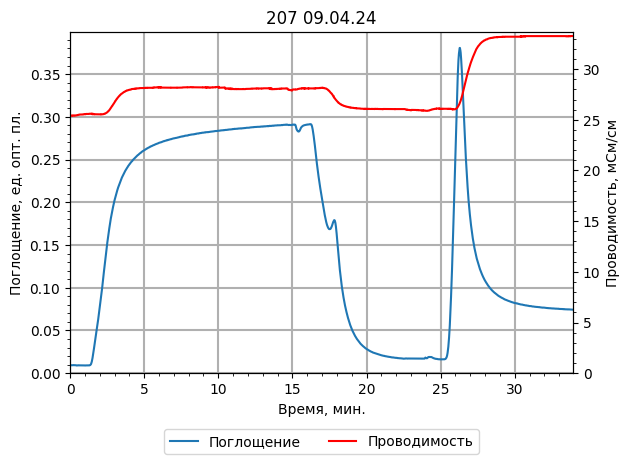

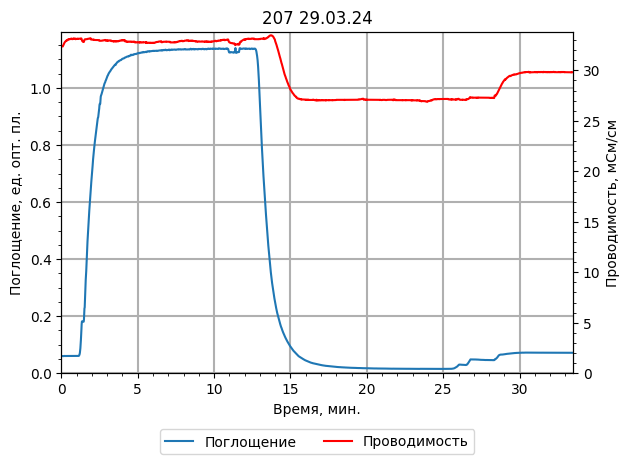

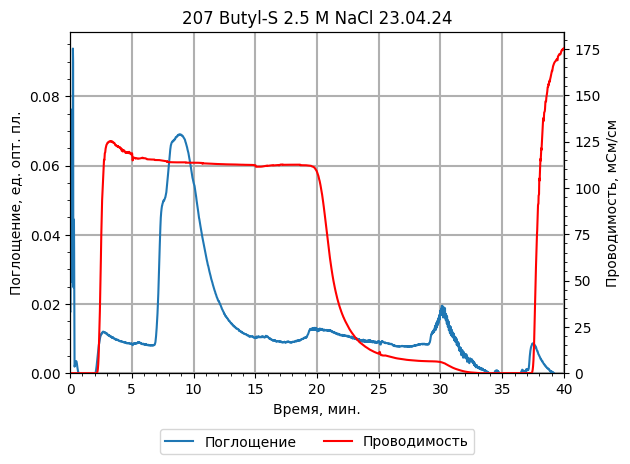

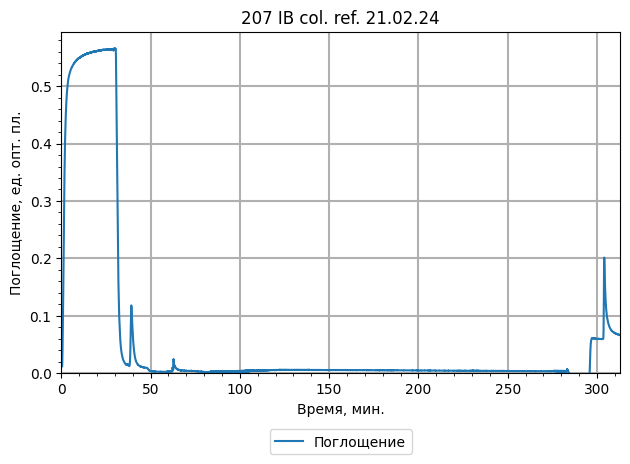

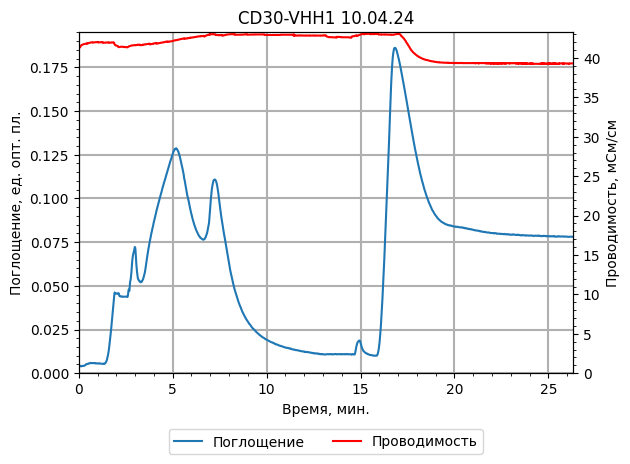

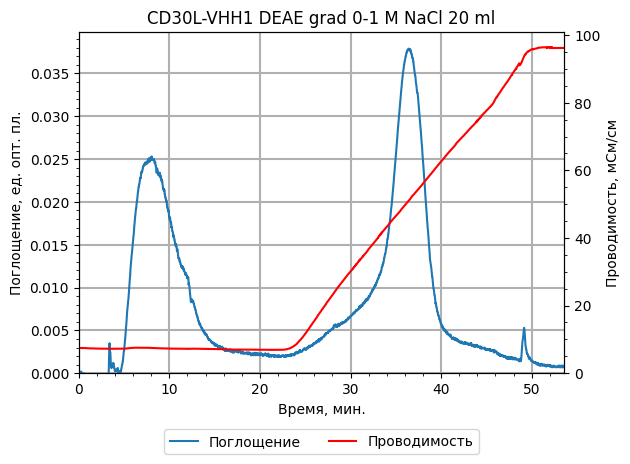

In [10]:
# Создать папку для хроматограмм в формате Excel, если её не существует
if not os.path.exists(r'./Хроматограммы для коллег'):

  os.makedirs(r'./Хроматограммы для коллег')

# Создать папку для готовых графиков хроматограмм, если её не существует
if not os.path.exists(r'./Экспресс картинки'):

  os.makedirs(r'./Экспресс картинки')

for i in file_queue:
  name = i[:-4]
  file_path = path + "/" + i

  with open(file_path, 'r') as f:
      lst = f.readlines()

  for n, k in enumerate(lst):
      if 'Time' in k:
          chrom_data = pd.read_csv(file_path, sep='\t', header=n)
          break

  del lst

  chrom_data = chrom_data.dropna(axis=1, how='all')

  if chrom_data.columns.str.contains('Conductivity').any():
      chrom_data.rename({k: v for k, v in zip(chrom_data.columns,
                                              ['Время, мин.',
                                                'Поглощение, ед. опт. пл.',
                                                'Проводимость, мСм/см',
                                                'События'])},
      axis=1, inplace=True)

  else:
      chrom_data.rename({k: v for k, v in zip(chrom_data.columns,
                                              ['Время, мин.',
                                                'Поглощение, ед. опт. пл.',
                                                'События'])},
                        axis=1, inplace=True)

  if chrom_data.columns.str.contains('События').any():

    chrom_data['Моменты времени'] = chrom_data['События'].dropna().str.split().apply(lambda x: x[1]).astype(float)

    chrom_data['События'] = chrom_data['События'].dropna().str.split().apply(lambda x: {'Start': 'Начало',
                                                                                        'End': 'Конец',
                                                                                        'Fraction': 'Фракция',
                                                                                        'Pause': 'Пауза'}.get(x[0], x[0]))

  chrom_data.to_excel(r'./Хроматограммы для коллег/' + name + '.xlsx', index=False)

  fig, ax = plt.subplots()
  line, = ax.plot(chrom_data['Время, мин.'],
                        chrom_data['Поглощение, ед. опт. пл.'],
                        label='Поглощение')

  ax.set_ylim(ymin=0)
  ax.minorticks_on()
  ax.grid(which='major', linewidth=1.5)
  ax.set_xlim((chrom_data['Время, мин.'].min(), chrom_data['Время, мин.'].max()))
  ax.set_title(name)
  ax.set_ylabel('Поглощение, ед. опт. пл.')
  ax.set_xlabel('Время, мин.')

  if chrom_data.columns.str.contains('Проводимость, мСм/см').any():
      ax1 = plt.twinx(ax)
      line1, = ax1.plot(chrom_data['Время, мин.'],
                chrom_data['Проводимость, мСм/см'],
                'r-',
                label='Проводимость')

      ax1.minorticks_on()
      ax1.set_ylabel('Проводимость, мСм/см')
      ax1.set_ylim(ymin=0)
      ax.legend(handles=[line, line1], bbox_to_anchor=(0.5, -0.2), loc='center', ncol=2)
  else:
      ax.legend(bbox_to_anchor=(0.5, -0.2), loc='center')
  plt.tight_layout()
  plt.savefig(r'./Экспресс картинки/' + name + '.jpeg', dpi=300)
  plt.show()


&emsp;Посмотрим на файлы, сохранённые в новых папках. Сначала посмотрим на содержимое папки `Хроматограммы для коллег`:

In [11]:
os.listdir(r'./Хроматограммы для коллег')

['207 09.04.24.xlsx',
 '207 29.03.24.xlsx',
 '207 Butyl-S 2.5 M NaCl 23.04.24.xlsx',
 '207 IB col. ref. 21.02.24.xlsx',
 'CD30-VHH1 10.04.24.xlsx',
 'CD30L-VHH1 DEAE grad 0-1 M NaCl 20 ml.xlsx']

&emsp;Как мы можем видеть, в папку действительно сохранились наши хроматограммы в виде Excel таблиц. Посмотрим, правильно ли они сохранились. Откроем случайную таблицу из данного списка и покажем её первые 4 строки:

In [13]:
random_table = r'./Хроматограммы для коллег/'\
 + np.random.choice(os.listdir(r'./Хроматограммы для коллег'), size=1)[0]
pd.read_excel(random_table).head(4)

,"Время, мин.","Поглощение, ед. опт. пл.","Проводимость, мСм/см",События,Моменты времени
0,0.000,0.0093,25.41,Начало,23.82
1,0.017,0.0094,25.41,Фракция,24.83
2,0.033,0.0094,25.41,Фракция,25.83
3,0.050,0.0093,25.43,Фракция,26.83


&emsp;Как мы видим, все столбцы перенеслись с правильными названиями. Данные в столбцах тоже перенеслись правильно. Рассмотрим теперь новую папку с графиками хроматограмм:

In [14]:
os.listdir(r'./Экспресс картинки')

['207 09.04.24.jpeg',
 '207 29.03.24.jpeg',
 '207 Butyl-S 2.5 M NaCl 23.04.24.jpeg',
 '207 IB col. ref. 21.02.24.jpeg',
 'CD30-VHH1 10.04.24.jpeg',
 'CD30L-VHH1 DEAE grad 0-1 M NaCl 20 ml.jpeg']

Посмотрим случайный график из сохранённых:

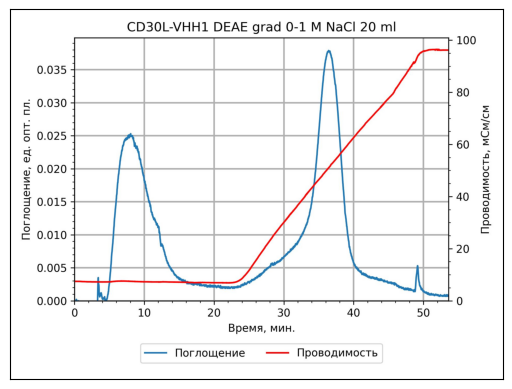

In [15]:
random_image = r'./Экспресс картинки/'\
 + np.random.choice(os.listdir(r'./Экспресс картинки'), size=1)[0]
img = plt.imread(random_image)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.imshow(img)
plt.show()

&emsp;Мы можем видеть, что график правильно отображается: легенду видно, оси подписаны, график подписан, графики отображаются правильно, создано две оси y.

## Раздел 3: Выводы

&emsp;С помощью языка программирования Python удалось обработать ряд хроматограмм:<br>
1) Были отброшены ненужные данные из исходных файлов;<br>
2) С помощью модуля `os` были прочитаны файлы из исходной папки `Хроматограммы` и созданы новые папки для сохранения полученных Excel таблиц и экспресс графиков с названиями `Хроматограммы для коллег` и `Экспресс картинки`, соответственно;<br>
3) С помощью библиотеки `pandas` была проведена обработка данных таблицы: были переназваны столбцы, разделён столбец `Events` на два столбца со строковыми данными и числовыми, переименованы элементы из столбца `События`, готовые таблицы были записаны в виде таблиц Excel;<br>
4) Были построены экспресс графики хроматограмм с помощью библиотеки `Matplotlib`. На графиках, где требовалось, было построено две оси y, легенда была вынесена за пределы графиков, чтобы она не мешала просмотру, названы графики и оси. Графики были сохранены в формате `.jpeg`;<br>
5) Была проведена проверка полученных таблиц и графиков. Данные в таблицах были правильно сохранены, столбцы названы правильно. Графики правильно сохранены: все элементы графика видны.